In [1]:
import matplotlib
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

### Evaluation Scenario 1 - ranging methods

In [3]:
a = np.load("results/survey_es1.npz")

rg=a["rg"]
d_bec_clearnight=a["d_bec_clearnight"]
d_rob_clearnight=a["d_rob_clearnight"]
d_bec_rainsun=a["d_bec_rainsun"]
d_rob_rainsun=a["d_rob_rainsun"]

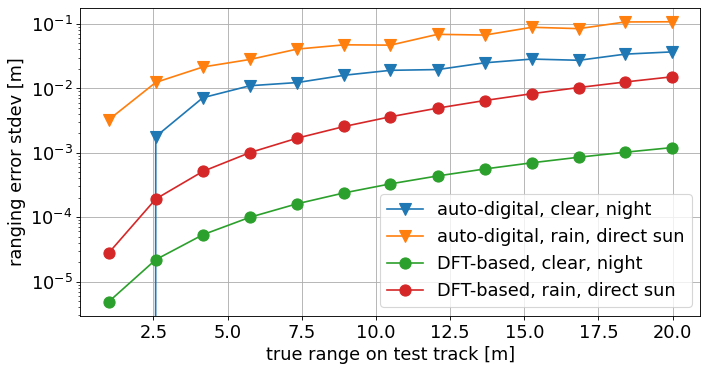

In [4]:
d_bec_clearnight_error = d_bec_clearnight - rg
d_rob_clearnight_error = d_rob_clearnight + rg # rob goes out as negative
d_bec_rainsun_error = d_bec_rainsun - rg
d_rob_rainsun_error = d_rob_rainsun + rg # rob goes out as negative

fig, ax = plt.subplots(figsize=(10, 5), dpi=80)
ax.semilogy(rg, np.std(d_bec_clearnight_error, axis=0),'-v', markersize=10)
ax.semilogy(rg, np.std(d_bec_rainsun_error, axis=0),'-v', markersize=10)
ax.semilogy(rg, np.std(d_rob_clearnight_error, axis=0),'-o', markersize=10)
ax.semilogy(rg, np.std(d_rob_rainsun_error, axis=0),'-o', markersize=10)
ax.grid()
ax.legend(['auto-digital, clear, night', 
           'auto-digital, rain, direct sun', 
           'DFT-based, clear, night', 
           'DFT-based, rain, direct sun'])
plt.ylabel('ranging error stdev [m]')
plt.xlabel('true range on test track [m]')
plt.savefig("results/survey_es1_res.png",bbox_inches='tight')

### Evaluation Scenario 2 - all methods, lane change

In [5]:
a = np.load("results/survey_es2.npz")

iterations = a["iterations"]
ldr = a["localization_decimation_rate"]
lns = a["localization_num_steps"]
x = a["xRL_to_rxL"][int(ldr/2)::ldr]
y = a["yRL_to_rxL"][int(ldr/2)::ldr]
h = a["hdg"][int(ldr/2)::ldr]
t = a["s_veh_clock"][int(ldr/2)::ldr]
cls_x_drb = a["cls_x_directbearing"] # all of the vars below are of size (localization_num_steps, iterations)
cls_y_drb = a["cls_y_directbearing"]
cls_x_drr = a["cls_x_directrange"]
cls_y_drr = a["cls_y_directrange"]
cls_x_dfb = a["cls_x_diffbearing"]
cls_y_dfb = a["cls_y_diffbearing"]
cls_x_dfr = a["cls_x_diffrange"]
cls_y_dfr = a["cls_y_diffrange"]
run_x_drr = a["run_rxL_x_directrange"]
run_y_drr = a["run_rxL_y_directrange"]
run_x_drb = a["run_rxL_x_directbearing"]
run_y_drb = a["run_rxL_y_directbearing"]

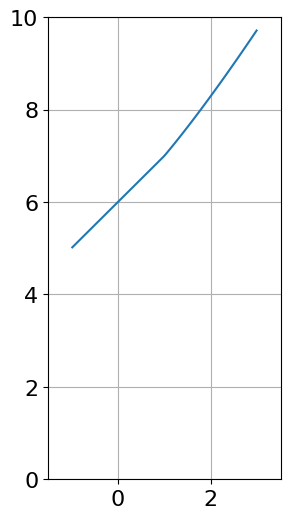

In [6]:
fig, ax = plt.subplots(figsize=(3, 6), dpi=100)
plt.plot(x, y)
plt.ylim([0.0, 10.0])
plt.xlim([-1.5, 3.5])
plt.grid()
plt.savefig("results/survey_es2_res_trj.png", bbox_inches="tight")

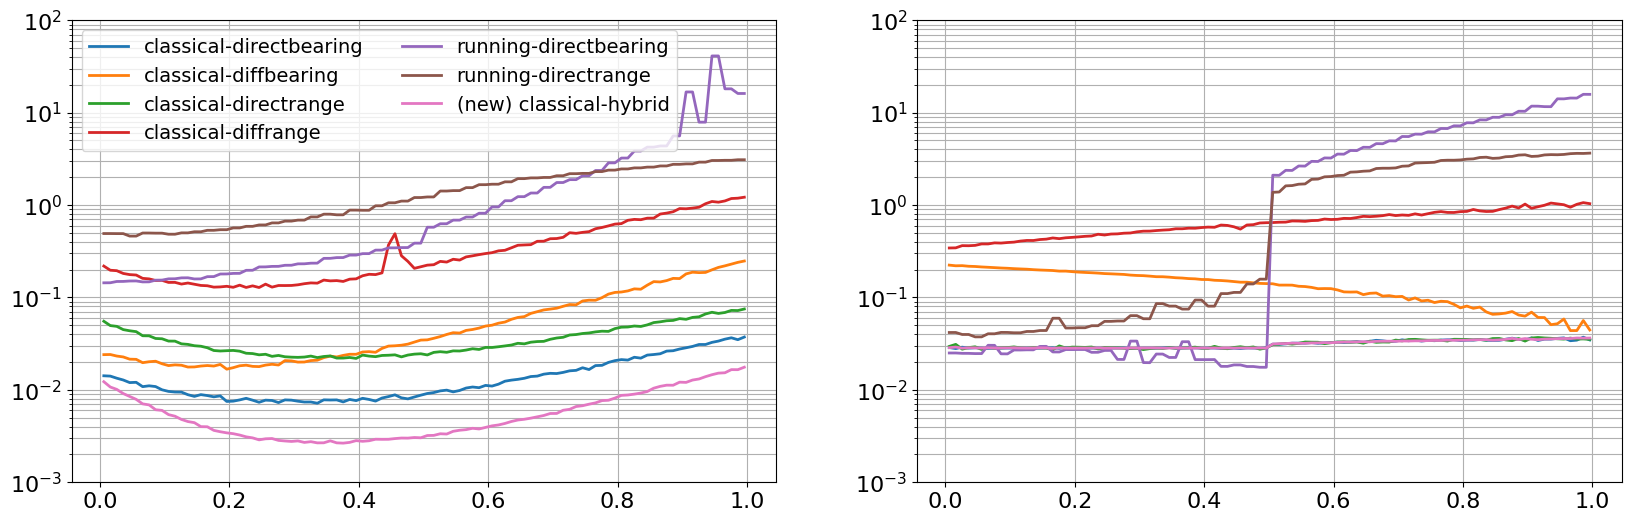

In [7]:
e_cls_x_directbearing     = np.std(np.expand_dims(x,-1) - cls_x_drb, axis=1)
e_cls_y_directbearing     = np.std(np.expand_dims(y,-1) - cls_y_drb, axis=1)
e_cls_x_diffbearing       = np.std(np.expand_dims(x,-1) - cls_x_dfb, axis=1)
e_cls_y_diffbearing       = np.std(np.expand_dims(y,-1) - cls_y_dfb, axis=1)
e_cls_x_directrange       = np.std(np.expand_dims(x,-1) - cls_x_drr, axis=1)
e_cls_y_directrange       = np.std(np.expand_dims(y,-1) - cls_y_drr, axis=1)
e_cls_x_diffrange         = np.std(np.expand_dims(x,-1) - cls_x_dfr, axis=1)
e_cls_y_diffrange         = np.std(np.expand_dims(y,-1) - cls_y_dfr, axis=1)
e_run_rxL_x_directbearing = np.std(np.expand_dims(x,-1) - run_x_drb, axis=1)
e_run_rxL_y_directbearing = np.std(np.expand_dims(y,-1) - run_y_drb, axis=1)
e_run_rxL_x_directrange   = np.std(np.expand_dims(x,-1) - run_x_drr, axis=1)
e_run_rxL_y_directrange   = np.std(np.expand_dims(y,-1) - run_y_drr, axis=1)

fig, ax = plt.subplots(1,2, figsize=(20, 6), dpi=100)
ax[0].semilogy(t, np.sqrt(e_cls_x_directbearing**2 + e_cls_y_directbearing**2), linewidth=2)
ax[0].semilogy(t, np.sqrt(e_cls_x_diffbearing**2 + e_cls_y_diffbearing**2), linewidth=2)
ax[0].semilogy(t, np.sqrt(e_cls_x_directrange**2 + e_cls_y_directrange**2), linewidth=2)
ax[0].semilogy(t, np.sqrt(e_cls_x_diffrange**2 + e_cls_y_diffrange**2), linewidth=2)
ax[0].semilogy(t, np.sqrt(e_run_rxL_x_directbearing**2 + e_run_rxL_y_directbearing**2), linewidth=2)
ax[0].semilogy(t, np.sqrt(e_run_rxL_x_directrange**2 + e_run_rxL_y_directrange**2), linewidth=2)
ax[0].semilogy(t, np.sqrt(e_cls_x_directbearing**2 + e_cls_y_directrange**2), linewidth=2)
ax[0].legend(["classical-directbearing", "classical-diffbearing", "classical-directrange", 
            "classical-diffrange", "running-directbearing", "running-directrange", "(new) classical-hybrid"],
             prop={'size': 14}, ncol=2)
ax[0].set_ylim([1e-3, 1e2])
ax[0].grid(which="both")

e_cls_x_directbearing_mean     = np.mean(np.expand_dims(x,-1) - cls_x_drb, axis=1)
e_cls_y_directbearing_mean     = np.mean(np.expand_dims(y,-1) - cls_y_drb, axis=1)
e_cls_x_diffbearing_mean       = np.mean(np.expand_dims(x,-1) - cls_x_dfb, axis=1)
e_cls_y_diffbearing_mean       = np.mean(np.expand_dims(y,-1) - cls_y_dfb, axis=1)
e_cls_x_directrange_mean       = np.mean(np.expand_dims(x,-1) - cls_x_drr, axis=1)
e_cls_y_directrange_mean       = np.mean(np.expand_dims(y,-1) - cls_y_drr, axis=1)
e_cls_x_diffrange_mean         = np.mean(np.expand_dims(x,-1) - cls_x_dfr, axis=1)
e_cls_y_diffrange_mean         = np.mean(np.expand_dims(y,-1) - cls_y_dfr, axis=1)
e_run_rxL_x_directbearing_mean = np.mean(np.expand_dims(x,-1) - run_x_drb, axis=1)
e_run_rxL_y_directbearing_mean = np.mean(np.expand_dims(y,-1) - run_y_drb, axis=1)
e_run_rxL_x_directrange_mean   = np.mean(np.expand_dims(x,-1) - run_x_drr, axis=1)
e_run_rxL_y_directrange_mean   = np.mean(np.expand_dims(y,-1) - run_y_drr, axis=1)

ax[1].semilogy(t, np.sqrt(e_cls_x_directbearing_mean**2 + e_cls_y_directbearing_mean**2), linewidth=2)
ax[1].semilogy(t, np.sqrt(e_cls_x_diffbearing_mean**2 + e_cls_y_diffbearing_mean**2), linewidth=2)
ax[1].semilogy(t, np.sqrt(e_cls_x_directrange_mean**2 + e_cls_y_directrange_mean**2), linewidth=2)
ax[1].semilogy(t, np.sqrt(e_cls_x_diffrange_mean**2 + e_cls_y_diffrange_mean**2), linewidth=2)
ax[1].semilogy(t, np.sqrt(e_run_rxL_x_directbearing_mean**2 + e_run_rxL_y_directbearing_mean**2), linewidth=2)
ax[1].semilogy(t, np.sqrt(e_run_rxL_x_directrange_mean**2 + e_run_rxL_y_directrange_mean**2), linewidth=2)
ax[1].semilogy(t, np.sqrt(e_cls_x_directbearing_mean**2 + e_cls_y_directrange_mean**2), linewidth=2)
ax[1].set_ylim([1e-3, 1e2])
ax[1].grid(which="both")

plt.savefig("results/survey_es2_res.png",bbox_inches='tight')

### Evaluation Scenario 3 - CRLBs for classical fixing methods

In [8]:
a = np.load("results/survey_es3.npz")

iterations = a["iterations"]
x=a["x"]
y=a["y"]
hdg=a["hdg"]
est_x_directbearing=a["est_x_directbearing"]
est_y_directbearing=a["est_y_directbearing"]
est_x_directrange=a["est_x_directrange"]
est_y_directrange=a["est_y_directrange"]
est_x_diffbearing=a["est_x_diffbearing"]
est_y_diffbearing=a["est_y_diffbearing"]
est_x_diffrange=a["est_x_diffrange"]
est_y_diffrange=a["est_y_diffrange"]
crlb_x_directbearing=a["crlb_x_directbearing"]
crlb_y_directbearing=a["crlb_y_directbearing"]
crlb_x_directrange=a["crlb_x_directrange"]
crlb_y_directrange=a["crlb_y_directrange"]
crlb_x_diffbearing=a["crlb_x_diffbearing"]
crlb_y_diffbearing=a["crlb_y_diffbearing"]
crlb_x_diffrange=a["crlb_x_diffrange"]
crlb_y_diffrange=a["crlb_y_diffrange"]

In [9]:
e_db_x  = np.expand_dims(x,axis=-1) - est_x_directbearing
e_db_y  = np.expand_dims(y,axis=-1) - est_y_directbearing
e_fb_x  = np.expand_dims(x,axis=-1) - est_x_diffbearing
e_fb_y  = np.expand_dims(y,axis=-1) - est_y_diffbearing
e_dr_x  = np.expand_dims(x,axis=-1) - est_x_directrange
e_dr_y  = np.expand_dims(y,axis=-1) - est_y_directrange
e_fr_x  = np.expand_dims(x,axis=-1) - est_x_diffrange
e_fr_y  = np.expand_dims(y,axis=-1) - est_y_diffrange

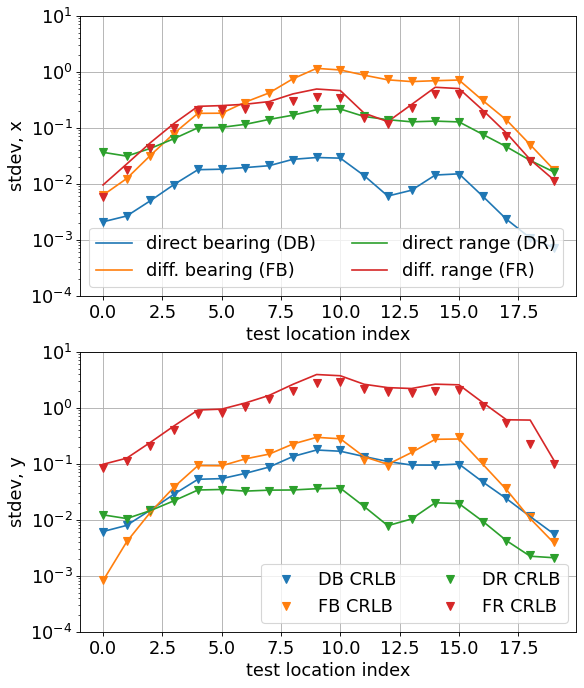

In [10]:
fig, ax = plt.subplots(2,1, figsize=(8, 10), dpi=80)
ax[0].semilogy(np.std(e_db_x, axis=-1),'-C0')
ax[0].semilogy(np.std(e_fb_x, axis=-1),'-C1')
ax[0].semilogy(np.std(e_dr_x, axis=-1),'-C2')
ax[0].semilogy(np.std(e_fr_x, axis=-1),'-C3')
ax[0].semilogy(np.sqrt(crlb_x_directbearing),'vC0', markersize=8)
ax[0].semilogy(np.sqrt(crlb_x_diffbearing),'vC1', markersize=8)
ax[0].semilogy(np.sqrt(crlb_x_directrange),'vC2', markersize=8)
ax[0].semilogy(np.sqrt(crlb_x_diffrange),'vC3', markersize=8)
ax[0].set_ylabel('stdev, x')
ax[0].set_xlabel('test location index')
ax[0].grid()
ax[0].set_ylim([1e-4, 1e1])
ax[0].legend(['direct bearing (DB)','diff. bearing (FB)','direct range (DR)','diff. range (FR)'], ncol=2)
ax[1].semilogy(np.sqrt(crlb_y_directbearing),'vC0', markersize=8)
ax[1].semilogy(np.sqrt(crlb_y_diffbearing),'vC1', markersize=8)
ax[1].semilogy(np.sqrt(crlb_y_directrange),'vC2', markersize=8)
ax[1].semilogy(np.sqrt(crlb_y_diffrange),'vC3', markersize=8)
ax[1].semilogy(np.std(e_db_y, axis=-1),'-C0')
ax[1].semilogy(np.std(e_fb_y, axis=-1),'-C1')
ax[1].semilogy(np.std(e_dr_y, axis=-1),'-C2')
ax[1].semilogy(np.std(e_fr_y, axis=-1),'-C3')
ax[1].set_ylabel('stdev, y')
ax[1].set_xlabel('test location index')
ax[1].grid()
ax[1].set_ylim([1e-4, 1e1])
ax[1].legend(['DB CRLB','FB CRLB','DR CRLB','FR CRLB'], ncol=2)
plt.savefig('results/survey_es3.png', bbox_inches="tight")

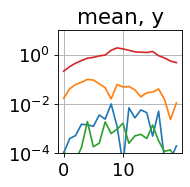

In [11]:
fig, ax = plt.subplots(1,1, figsize=(2, 2), dpi=80)
ax.semilogy(np.abs(np.mean(e_db_y, axis=-1)),'-C0')
ax.semilogy(np.abs(np.mean(e_fb_y, axis=-1)),'-C1')
ax.semilogy(np.abs(np.mean(e_dr_y, axis=-1)),'-C2')
ax.semilogy(np.abs(np.mean(e_fr_y, axis=-1)),'-C3')
ax.set_title('mean, y')
ax.grid()
ax.set_ylim([1e-4, 1e1])
plt.savefig('results/survey_es3_means.png', bbox_inches="tight")

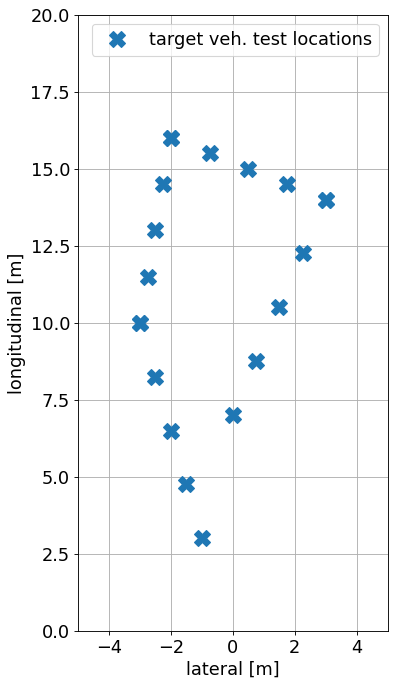

In [12]:
fig, ax = plt.subplots(figsize=(5, 10), dpi=80)
ax.plot(x, y, 'X', markersize=15)
plt.xlim([-5,5])
plt.ylim([0,20])
ax.grid()
ax.legend(['target veh. test locations'])
plt.xlabel('lateral [m]')
plt.ylabel('longitudinal [m]')
plt.savefig('results/survey_es3_crlb_track.png', bbox_inches="tight")

### Evaluation Scenario 4 - direct methods vs hybrid method heatmap

In [13]:
a = np.load("results/survey_es4.npz")

x = a["xRL_to_rxL"]
y = a["yRL_to_rxL"]
h = a["hdg"]
x = np.repeat(np.repeat(np.reshape(x,(x.shape[0],1,1,1)), y.shape[0], axis=1), h.shape[0], axis=2)
y = np.repeat(np.repeat(np.reshape(y,(1,y.shape[0],1,1)), x.shape[0], axis=0), h.shape[0], axis=2)
h = np.repeat(np.repeat(np.reshape(h,(1,1,h.shape[0],1)), x.shape[0], axis=0), y.shape[0], axis=1)
cls_x_directbearing_map = a["cls_x_directbearing_map"]
cls_y_directbearing_map = a["cls_y_directbearing_map"]
cls_x_directrange_map = a["cls_x_directrange_map"]
cls_y_directrange_map = a["cls_y_directrange_map"]

In [14]:
# stdv over heading and iterations axes
e_cls_x_drb = np.std(np.std(cls_x_directbearing_map - x, axis=-1), axis=-1)
e_cls_y_drb = np.std(np.std(cls_y_directbearing_map - y, axis=-1), axis=-1)
e_cls_x_drr = np.std(np.std(cls_x_directrange_map - x, axis=-1), axis=-1)
e_cls_y_drr = np.std(np.std(cls_y_directrange_map - y, axis=-1), axis=-1)

e_cls_drb = np.sqrt(e_cls_x_drb**2 + e_cls_y_drb**2)
e_cls_drr = np.sqrt(e_cls_x_drr**2 + e_cls_y_drr**2)
e_cls_hyb = np.sqrt(e_cls_x_drb**2 + e_cls_y_drr**2)

/home/ubuntu/venv_p310/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [15]:
set_vmax = np.log10(np.max((np.nanmax(e_cls_drb), np.nanmax(e_cls_drr), np.nanmax(e_cls_hyb))))
set_vmin = np.log10(np.min((np.nanmin(e_cls_drb), np.nanmin(e_cls_drr), np.nanmin(e_cls_hyb))))

In [16]:
e_cls_drr[np.logical_or(np.isnan(e_cls_drb), np.isnan(e_cls_drr))] = np.nan
e_cls_drb[np.logical_or(np.isnan(e_cls_drb), np.isnan(e_cls_drr))] = np.nan
e_cls_hyb[np.logical_or(np.isnan(e_cls_drb), np.isnan(e_cls_drr))] = np.nan

/tmp/ipykernel_14119/3875460573.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(["0.01 mm", "0.1 mm", "0.1 cm", "1 cm", "10 cm", "1 m"])


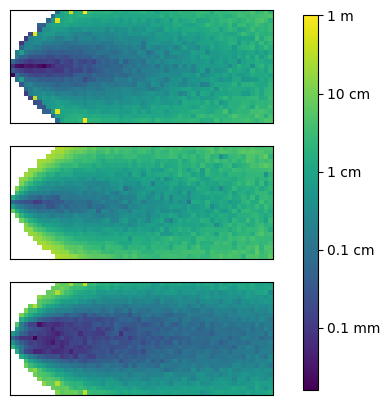

In [17]:
plotlist = [e_cls_drb, e_cls_drr, e_cls_hyb]
fig, axs = plt.subplots(3,1,figsize=(15, 5),dpi=100)
for idd in range(3):
    ax = axs[idd]
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plotid = ax.imshow(np.log10(plotlist[idd]), vmin = set_vmin, vmax = set_vmax)
    #fig.colorbar(plotid, ax=ax)

fig.subplots_adjust(right=0.3)
cbar_ax = fig.add_axes([0.32, 0.12, 0.01, 0.75])
cbar = fig.colorbar(plotid, cax=cbar_ax)
cbar.set_ticklabels(["0.01 mm", "0.1 mm", "0.1 cm", "1 cm", "10 cm", "1 m"])
cbar.ax.tick_params(labelsize=10)

plt.savefig("results/survey_es4_res.png",bbox_inches='tight')

### Evaluation Scenario 5 - collision course, different weather

In [18]:
a = np.load("results/survey_es5.npz")

iterations=a["iterations"]
ldr=a["localization_decimation_rate"]
lns=a["localization_num_steps"]
xRL_to_rxL=a["xRL_to_rxL"]
yRL_to_rxL=a["yRL_to_rxL"]
hdg=a["hdg"]
est_x_clrnight=a["est_x_clrnight"]
est_y_clrnight=a["est_y_clrnight"]
est_x_clrdayindirect=a["est_x_clrdayindirect"]
est_y_clrdayindirect=a["est_y_clrdayindirect"]
est_x_clrdaydirect=a["est_x_clrdaydirect"]
est_y_clrdaydirect=a["est_y_clrdaydirect"]
est_x_rainnight=a["est_x_rainnight"]
est_y_rainnight=a["est_y_rainnight"]
est_x_raindayindirect=a["est_x_raindayindirect"]
est_y_raindayindirect=a["est_y_raindayindirect"]
est_x_raindaydirect=a["est_x_raindaydirect"]
est_y_raindaydirect=a["est_y_raindaydirect"]
est_x_fognight=a["est_x_fognight"]
est_y_fognight=a["est_y_fognight"]
est_x_fogdayindirect=a["est_x_fogdayindirect"]
est_y_fogdayindirect=a["est_y_fogdayindirect"]

# forgot to save this, so recreating it here
t = np.linspace(0,1.5,1500)[5::10]

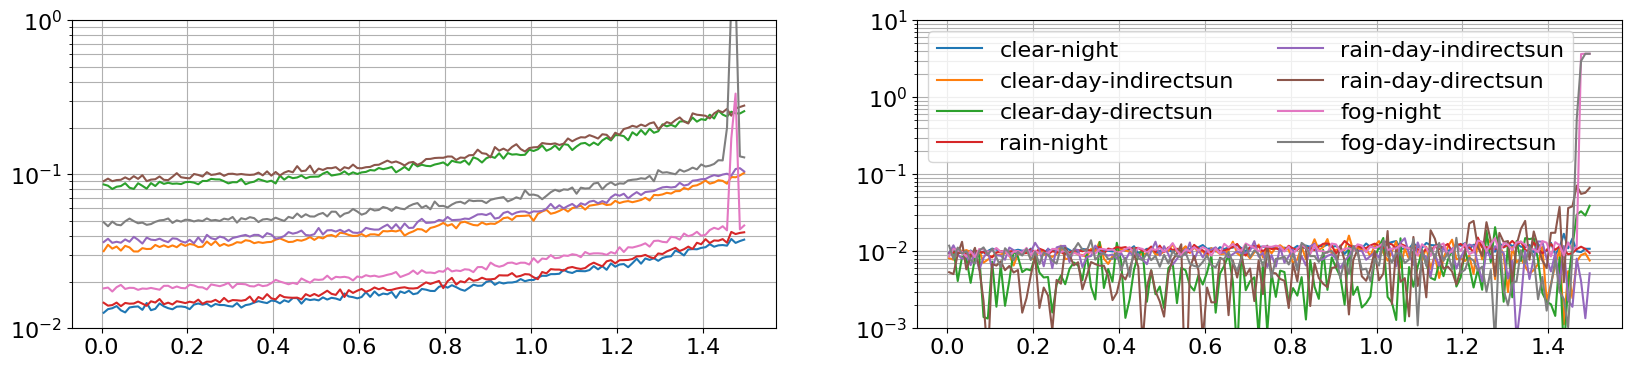

In [19]:
e_x_clrnight = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_clrnight, axis=-1)
e_y_clrnight = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_clrnight, axis=-1)
e_x_clrdayindirect = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_clrdayindirect, axis=-1)
e_y_clrdayindirect = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_clrdayindirect, axis=-1)
e_x_clrdaydirect = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_clrdaydirect, axis=-1)
e_y_clrdaydirect = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_clrdaydirect, axis=-1)
e_x_rainnight = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_rainnight, axis=-1)
e_y_rainnight = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_rainnight, axis=-1)
e_x_raindayindirect = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_raindayindirect, axis=-1)
e_y_raindayindirect = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_raindayindirect, axis=-1)
e_x_raindaydirect = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_raindaydirect, axis=-1)
e_y_raindaydirect = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_raindaydirect, axis=-1)
e_x_fognight = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_fognight, axis=-1)
e_y_fognight = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_fognight, axis=-1)
e_x_fogdayindirect = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_fogdayindirect, axis=-1)
e_y_fogdayindirect = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_fogdayindirect, axis=-1)

fig, ax = plt.subplots(1,2, figsize=(20, 4), dpi=100)
ax[0].semilogy(t, np.sqrt(e_x_clrnight**2 + e_y_clrnight**2))
ax[0].semilogy(t, np.sqrt(e_x_clrdayindirect**2 + e_y_clrdayindirect**2))
ax[0].semilogy(t, np.sqrt(e_x_clrdaydirect**2 + e_y_clrdaydirect**2))
ax[0].semilogy(t, np.sqrt(e_x_rainnight**2 + e_y_rainnight**2))
ax[0].semilogy(t, np.sqrt(e_x_raindayindirect**2 + e_y_raindayindirect**2))
ax[0].semilogy(t, np.sqrt(e_x_raindaydirect**2 + e_y_raindaydirect**2))
ax[0].semilogy(t, np.sqrt(e_x_fognight**2 + e_y_fognight**2))
ax[0].semilogy(t, np.sqrt(e_x_fogdayindirect**2 + e_y_fogdayindirect**2))
ax[0].set_ylim([1e-2, 1e0])
ax[0].grid(which="both")

e_x_clrnight = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_clrnight, axis=-1)
e_y_clrnight = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_clrnight, axis=-1)
e_x_clrdayindirect = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_clrdayindirect, axis=-1)
e_y_clrdayindirect = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_clrdayindirect, axis=-1)
e_x_clrdaydirect = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_clrdaydirect, axis=-1)
e_y_clrdaydirect = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_clrdaydirect, axis=-1)
e_x_rainnight = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_rainnight, axis=-1)
e_y_rainnight = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_rainnight, axis=-1)
e_x_raindayindirect = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_raindayindirect, axis=-1)
e_y_raindayindirect = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_raindayindirect, axis=-1)
e_x_raindaydirect = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_raindaydirect, axis=-1)
e_y_raindaydirect = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_raindaydirect, axis=-1)
e_x_fognight = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_fognight, axis=-1)
e_y_fognight = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_fognight, axis=-1)
e_x_fogdayindirect = np.mean(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_fogdayindirect, axis=-1)
e_y_fogdayindirect = np.mean(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_fogdayindirect, axis=-1)

ax[1].semilogy(t, np.sqrt(e_x_clrnight**2 + e_y_clrnight**2))
ax[1].semilogy(t, np.sqrt(e_x_clrdayindirect**2 + e_y_clrdayindirect**2))
ax[1].semilogy(t, np.sqrt(e_x_clrdaydirect**2 + e_y_clrdaydirect**2))
ax[1].semilogy(t, np.sqrt(e_x_rainnight**2 + e_y_rainnight**2))
ax[1].semilogy(t, np.sqrt(e_x_raindayindirect**2 + e_y_raindayindirect**2))
ax[1].semilogy(t, np.sqrt(e_x_raindaydirect**2 + e_y_raindaydirect**2))
ax[1].semilogy(t, np.sqrt(e_x_fognight**2 + e_y_fognight**2))
ax[1].semilogy(t, np.sqrt(e_x_fogdayindirect**2 + e_y_fogdayindirect**2))
ax[1].set_ylim([1e-3, 1e1])
ax[1].legend(["clear-night", "clear-day-indirectsun", "clear-day-directsun", 
            "rain-night", "rain-day-indirectsun", "rain-day-directsun", 
            "fog-night", "fog-day-indirectsun"],ncol=2)
ax[1].grid(which="both")

plt.savefig("results/survey_es5_res.png", bbox_inches="tight")

### Evaluation Scenario 6 - hybrid method, platooning, different speeds

In [20]:
a = np.load("results/survey_es6.npz")

iterations=a["iterations"]
ldr=a["ldr"]
lns_slow2=a["lns_slow2"]
lns_slow1=a["lns_slow1"]
lns_normal=a["lns_normal"]
lns_fast1=a["lns_fast1"]
lns_fast2=a["lns_fast2"]
xRL_to_rxL_slow2=a["xRL_to_rxL_slow2"]
yRL_to_rxL_slow2=a["yRL_to_rxL_slow2"]
hdg_slow2=a["hdg_slow2"]
xRL_to_rxL_slow1=a["xRL_to_rxL_slow1"]
yRL_to_rxL_slow1=a["yRL_to_rxL_slow1"]
hdg_slow1=a["hdg_slow1"]
xRL_to_rxL_normal=a["xRL_to_rxL_normal"]
yRL_to_rxL_normal=a["yRL_to_rxL_normal"]
hdg_normal=a["hdg_normal"]
xRL_to_rxL_fast1=a["xRL_to_rxL_fast1"]
yRL_to_rxL_fast1=a["yRL_to_rxL_fast1"]
hdg_fast1=a["hdg_fast1"]
xRL_to_rxL_fast2=a["xRL_to_rxL_fast2"]
yRL_to_rxL_fast2=a["yRL_to_rxL_fast2"]
hdg_fast2=a["hdg_fast2"]
s_veh_clock_slow2=a["s_veh_clock_slow2"]
s_veh_clock_slow1=a["s_veh_clock_slow1"]
s_veh_clock_normal=a["s_veh_clock_normal"]
s_veh_clock_fast1=a["s_veh_clock_fast1"]
s_veh_clock_fast2=a["s_veh_clock_fast2"]
est_x_slow2=a["est_x_slow2"]
est_x_slow1=a["est_x_slow1"]
est_x_normal=a["est_x_normal"]
est_x_fast1=a["est_x_fast1"]
est_x_fast2=a["est_x_fast2"]
est_y_slow2=a["est_y_slow2"]
est_y_slow1=a["est_y_slow1"]
est_y_normal=a["est_y_normal"]
est_y_fast1=a["est_y_fast1"]
est_y_fast2=a["est_y_fast2"]

In [21]:
def avg_speed(x,y,dt):
    return np.mean(np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2)/dt)*3.6

print("slow2_avgspeed:", avg_speed(xRL_to_rxL_slow2, yRL_to_rxL_slow2, s_veh_clock_slow2[1]-s_veh_clock_slow2[0]))
print("slow1_avgspeed:", avg_speed(xRL_to_rxL_slow1, yRL_to_rxL_slow1, s_veh_clock_slow1[1]-s_veh_clock_slow1[0]))
print("normal_avgspeed:", avg_speed(xRL_to_rxL_normal, yRL_to_rxL_normal, s_veh_clock_normal[1]-s_veh_clock_normal[0]))
print("fast1_avgspeed:", avg_speed(xRL_to_rxL_fast1, yRL_to_rxL_fast1, s_veh_clock_fast1[1]-s_veh_clock_fast1[0]))
print("fast2_avgspeed:", avg_speed(xRL_to_rxL_fast2, yRL_to_rxL_fast2, s_veh_clock_fast2[1]-s_veh_clock_fast2[0]))

slow2_avgspeed: 12.306765970496633
slow1_avgspeed: 24.619681252426396
normal_avgspeed: 49.26405546431536
fast1_avgspeed: 98.62389074477382
fast2_avgspeed: 197.63828981915174


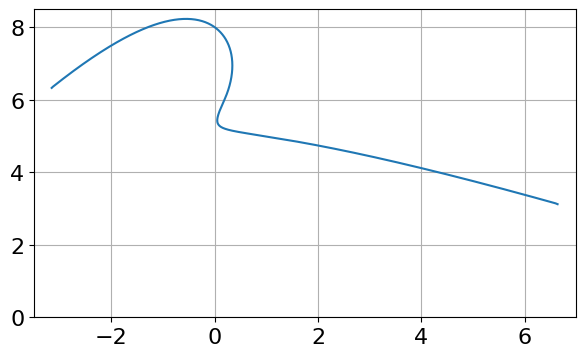

In [22]:
figure(figsize=(7, 4), dpi=100)
plt.plot(xRL_to_rxL_normal, yRL_to_rxL_normal)
plt.ylim([0.0, 8.5])
plt.xlim([-3.5, 7.0])
plt.grid()
plt.savefig("results/survey_es6_res_trj.png", bbox_inches="tight")

In [23]:
slow2_time  = np.linspace(0,1,4000)[5::10]
slow1_time  = np.linspace(0,1,2000)[5::10]
normal_time = np.linspace(0,1,1000)[5::10]
fast1_time  = np.linspace(0,1,500)[5::10]
fast2_time  = np.linspace(0,1,250)[5::10]

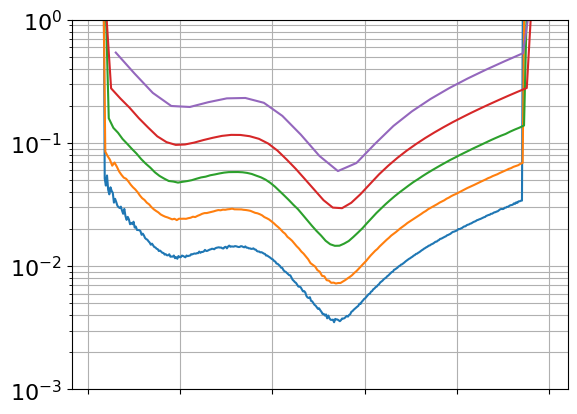

In [24]:
e_x_slow1_mean   = np.mean(np.expand_dims(xRL_to_rxL_slow1[int(ldr/2)::ldr], axis=-1) - est_x_slow1, axis=-1)
e_y_slow1_mean   = np.mean(np.expand_dims(yRL_to_rxL_slow1[int(ldr/2)::ldr], axis=-1) - est_y_slow1, axis=-1)
e_x_slow2_mean   = np.mean(np.expand_dims(xRL_to_rxL_slow2[int(ldr/2)::ldr], axis=-1) - est_x_slow2, axis=-1)
e_y_slow2_mean   = np.mean(np.expand_dims(yRL_to_rxL_slow2[int(ldr/2)::ldr], axis=-1) - est_y_slow2, axis=-1)
e_x_normal_mean  = np.mean(np.expand_dims(xRL_to_rxL_normal[int(ldr/2)::ldr], axis=-1) - est_x_normal, axis=-1)
e_y_normal_mean  = np.mean(np.expand_dims(yRL_to_rxL_normal[int(ldr/2)::ldr], axis=-1) - est_y_normal, axis=-1)
e_x_fast1_mean   = np.mean(np.expand_dims(xRL_to_rxL_fast1[int(ldr/2)::ldr], axis=-1) - est_x_fast1, axis=-1)
e_y_fast1_mean   = np.mean(np.expand_dims(yRL_to_rxL_fast1[int(ldr/2)::ldr], axis=-1) - est_y_fast1, axis=-1)
e_x_fast2_mean   = np.mean(np.expand_dims(xRL_to_rxL_fast2[int(ldr/2)::ldr], axis=-1) - est_x_fast2, axis=-1)
e_y_fast2_mean   = np.mean(np.expand_dims(yRL_to_rxL_fast2[int(ldr/2)::ldr], axis=-1) - est_y_fast2, axis=-1)

fig, ax = plt.subplots()
plt.semilogy(slow2_time, np.sqrt(e_x_slow2_mean**2 + e_y_slow2_mean**2))
plt.semilogy(slow1_time, np.sqrt(e_x_slow1_mean**2 + e_y_slow1_mean**2))
plt.semilogy(normal_time, np.sqrt(e_x_normal_mean**2 + e_y_normal_mean**2))
plt.semilogy(fast1_time, np.sqrt(e_x_fast1_mean**2 + e_y_fast1_mean**2))
plt.semilogy(fast2_time, np.sqrt(e_x_fast2_mean**2 + e_y_fast2_mean**2))
ax.set_xticklabels([])
#ax[1].legend(["4x slow", "2x slow", "normal", "2x fast", "4x fast"], prop={"size":10})
plt.ylim([1e-3,1e0])
plt.grid(which="both")
plt.savefig("results/survey_es6_res_mean.png", bbox_inches="tight")

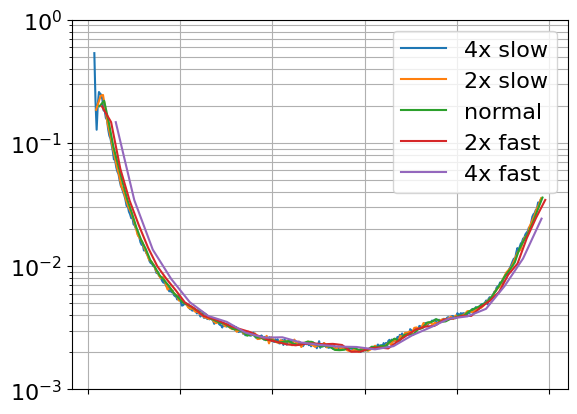

In [25]:
e_x_slow1        = np.std(np.expand_dims(xRL_to_rxL_slow1[int(ldr/2)::ldr], axis=-1) - est_x_slow1, axis=-1)
e_y_slow1        = np.std(np.expand_dims(yRL_to_rxL_slow1[int(ldr/2)::ldr], axis=-1) - est_y_slow1, axis=-1)
e_x_slow2        = np.std(np.expand_dims(xRL_to_rxL_slow2[int(ldr/2)::ldr], axis=-1) - est_x_slow2, axis=-1)
e_y_slow2        = np.std(np.expand_dims(yRL_to_rxL_slow2[int(ldr/2)::ldr], axis=-1) - est_y_slow2, axis=-1)
e_x_normal       = np.std(np.expand_dims(xRL_to_rxL_normal[int(ldr/2)::ldr], axis=-1) - est_x_normal, axis=-1)
e_y_normal       = np.std(np.expand_dims(yRL_to_rxL_normal[int(ldr/2)::ldr], axis=-1) - est_y_normal, axis=-1)
e_x_fast1        = np.std(np.expand_dims(xRL_to_rxL_fast1[int(ldr/2)::ldr], axis=-1) - est_x_fast1, axis=-1)
e_y_fast1        = np.std(np.expand_dims(yRL_to_rxL_fast1[int(ldr/2)::ldr], axis=-1) - est_y_fast1, axis=-1)
e_x_fast2        = np.std(np.expand_dims(xRL_to_rxL_fast2[int(ldr/2)::ldr], axis=-1) - est_x_fast2, axis=-1)
e_y_fast2        = np.std(np.expand_dims(yRL_to_rxL_fast2[int(ldr/2)::ldr], axis=-1) - est_y_fast2, axis=-1)

fig, ax = plt.subplots()
plt.semilogy(slow2_time, np.sqrt(e_x_slow2**2 + e_y_slow2**2))
plt.semilogy(slow1_time, np.sqrt(e_x_slow1**2 + e_y_slow1**2))
plt.semilogy(normal_time, np.sqrt(e_x_normal**2 + e_y_normal**2))
plt.semilogy(fast1_time, np.sqrt(e_x_fast1**2 + e_y_fast1**2))
plt.semilogy(fast2_time, np.sqrt(e_x_fast2**2 + e_y_fast2**2))
plt.ylim([1e-3,1e0])
ax.set_xticklabels([])
plt.legend(["4x slow", "2x slow", "normal", "2x fast", "4x fast"])
plt.grid(which="both")
plt.savefig("results/survey_es6_res_stdev.png", bbox_inches="tight")

### Evaluation Scenario 7 - hybrid method, platooning, different patterns and heights

In [26]:
a = np.load("results/survey_es7.npz")

iterations=a["iterations"]
ldr=a["ldr"]
lns=a["lns"]
xRL_to_rxL=a["xRL_to_rxL"]
yRL_to_rxL=a["yRL_to_rxL"]
hdg=a["hdg"]
s_veh_clock=a["s_veh_clock"][5::10]
est_x_lmb20=a["est_x_lmb20"]
est_y_lmb20=a["est_y_lmb20"]
est_x_lmb50=a["est_x_lmb50"]
est_y_lmb50=a["est_y_lmb50"]
est_x_pcwlmb=a["est_x_pcwlmb"]
est_y_pcwlmb=a["est_y_pcwlmb"]
est_x_real=a["est_x_real"]
est_y_real=a["est_y_real"]
est_x_lmb20_z0p15=a["est_x_lmb20_z0p15"]
est_y_lmb20_z0p15=a["est_y_lmb20_z0p15"]
est_x_lmb20_z0p30=a["est_x_lmb20_z0p30"]
est_y_lmb20_z0p30=a["est_y_lmb20_z0p30"]
est_x_lmb20_z0p45=a["est_x_lmb20_z0p45"]
est_y_lmb20_z0p45=a["est_y_lmb20_z0p45"]
est_x_lmb20_z0p60=a["est_x_lmb20_z0p60"]
est_y_lmb20_z0p60=a["est_y_lmb20_z0p60"]

In [27]:
e_x_lmb20  = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_lmb20, axis=-1)
e_y_lmb20  = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_lmb20, axis=-1)
e_x_lmb50  = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_lmb50, axis=-1)
e_y_lmb50  = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_lmb50, axis=-1)
e_x_pcwlmb = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_pcwlmb, axis=-1)
e_y_pcwlmb = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_pcwlmb, axis=-1)
e_x_real   = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_real, axis=-1)
e_y_real   = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_real, axis=-1)
e_x_lmb20_z0p15  = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_lmb20_z0p15, axis=-1)
e_y_lmb20_z0p15  = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_lmb20_z0p15, axis=-1)
e_x_lmb20_z0p30  = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_lmb20_z0p30, axis=-1)
e_y_lmb20_z0p30  = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_lmb20_z0p30, axis=-1)
e_x_lmb20_z0p45  = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_lmb20_z0p45, axis=-1)
e_y_lmb20_z0p45  = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_lmb20_z0p45, axis=-1)
e_x_lmb20_z0p60  = np.std(np.expand_dims(xRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_x_lmb20_z0p60, axis=-1)
e_y_lmb20_z0p60  = np.std(np.expand_dims(yRL_to_rxL[int(ldr/2)::ldr], axis=-1) - est_y_lmb20_z0p60, axis=-1)

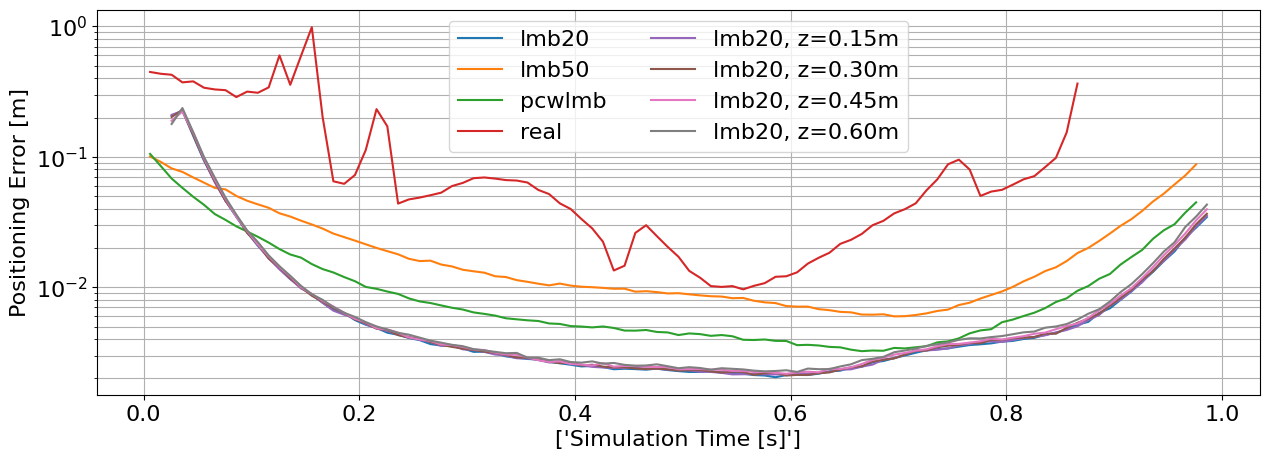

In [28]:
figure(figsize=(15,5), dpi=100)
plt.semilogy(s_veh_clock, np.sqrt(e_x_lmb20**2 + e_y_lmb20**2))
plt.semilogy(s_veh_clock, np.sqrt(e_x_lmb50**2 + e_y_lmb50**2))
plt.semilogy(s_veh_clock, np.sqrt(e_x_pcwlmb**2 + e_y_pcwlmb**2))
plt.semilogy(s_veh_clock, np.sqrt(e_x_real**2 + e_y_real**2))
plt.semilogy(s_veh_clock, np.sqrt(e_x_lmb20_z0p15**2 + e_y_lmb20_z0p15**2))
plt.semilogy(s_veh_clock, np.sqrt(e_x_lmb20_z0p30**2 + e_y_lmb20_z0p30**2))
plt.semilogy(s_veh_clock, np.sqrt(e_x_lmb20_z0p45**2 + e_y_lmb20_z0p45**2))
plt.semilogy(s_veh_clock, np.sqrt(e_x_lmb20_z0p60**2 + e_y_lmb20_z0p60**2))
plt.legend(["lmb20", "lmb50", "pcwlmb", "real", "lmb20, z=0.15m", "lmb20, z=0.30m", "lmb20, z=0.45m", "lmb20, z=0.60m"], ncol=2)
plt.xlabel(["Simulation Time [s]"])
plt.ylabel("Positioning Error [m]")
plt.grid(which="both")
plt.savefig("results/survey_es7_res_speed_stdv.png", bbox_inches="tight")